# Exploratory Data Analysis (EDA) - 2024 Polling Data

## Objectives

* Load the cleaned dataset that was created in the previous notebook.
* Explore the structure and summary statistics.
* Visualize distributions of polling percentage data.
* Explore the trends over time. 
* Compare pollsters and methodologies.
* Look for correlations and potential relationships in the data.

## Inputs

* generic_ballot_polls_clean.csv (From 01_etl_pipeline notebook)
* Python libraries

## Outputs

* Visualisations and insights to guide feature engineering and modelling.

# Hypotheses

Before performing exploratory data analysis, we outline a set of hypotheses that can guide our investigation and interpretation of trends:

` 1. Trends Over Time`
- Democratic support (`dem`) will increase or fluctuate over time leading up to the election.
- Republican support (`rep`) will inversely correlate with Democratic support over time.
- The spread between Democratic and Republican support may widen or narrow in response to key political events.

`2. Polling Methodology`
- Online polls produce higher variability in results compared to telephone polls.
- Certain methodologies (online vs telephone) may systematically favor one party.

` 3. Pollster Differences`
- Pollsters with higher `numeric_grade` ratings provide results closer to the average of all polls (lower variance).
- Some pollsters may consistently favor one party.

` 4. Sample Size Effects`
- Polls with larger `sample_size` have lower variance in Democratic and Republican percentages.
- Small-sample polls show more extreme or outlier results.

 `5. Correlations`
- Higher-rated pollsters correlate with less variance and more accurate predictions.
- There is a negative correlation between `dem` and `rep` (as one rises, the other falls).

These hypotheses will guide our visualizations and statistical analyses in the EDA, allowing us to identify trends, potential biases, and relationships between variables.

---

# Section 1 - Load The Cleaned Dataset

In this section, we will : 
* Load the previously created cleaned dataset.
* Preview the dataset. 
* Inspect the structure and summary statistics.

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

BASE_DIR = Path().resolve().parent
df = pd.read_csv(BASE_DIR / "data" / "clean" / "generic_ballot_polls_clean.csv")

df.head()

,start_date,end_date,pollster,sample_size,dem,rep,ind,methodology,pollster_rating_id,numeric_grade
0,2024-08-12,2024-08-14,Emerson,1000.0,47.5,45.5,NaN,IVR/Online Panel/Text-to-Web,88,2.9
1,2024-08-11,2024-08-13,YouGov,1407.0,45.0,44.0,NaN,Online Panel,391,2.9
2,2024-08-08,2024-08-12,Monmouth,801.0,48.0,46.0,NaN,Live Phone/Text-to-Web,215,2.9
3,2024-08-06,2024-08-08,Cygnal,1500.0,46.4,47.1,NaN,NaN,67,2.1
4,2024-08-04,2024-08-06,YouGov,1413.0,45.0,44.0,NaN,Online Panel,391,2.9


This has loaded the cleaned dataset from the previous ETL notebook. 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_date          608 non-null    object 
 1   end_date            608 non-null    object 
 2   pollster            608 non-null    object 
 3   sample_size         608 non-null    float64
 4   dem                 608 non-null    float64
 5   rep                 608 non-null    float64
 6   ind                 0 non-null      float64
 7   methodology         584 non-null    object 
 8   pollster_rating_id  608 non-null    int64  
 9   numeric_grade       568 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 47.6+ KB


This provides an overview of colum names, datatypes and missing values.

In [99]:
df.describe(include='all')

,start_date,end_date,pollster,sample_size,dem,rep,ind,methodology,pollster_rating_id,numeric_grade
count,608,608,608,608.000000,608.000000,608.000000,0.0,584,608.000000,568.000000
unique,452,446,47,NaN,NaN,NaN,NaN,18,NaN,NaN
top,2024-07-26,2024-07-21,Morning Consult,NaN,NaN,NaN,NaN,Online Panel,NaN,NaN
freq,7,5,269,NaN,NaN,NaN,NaN,494,NaN,NaN
mean,NaN,NaN,NaN,4064.430921,44.547138,43.802632,NaN,NaN,277.256579,1.907218
std,NaN,NaN,NaN,3043.419823,2.023785,2.238474,NaN,NaN,164.292873,0.671727
min,NaN,NaN,NaN,500.000000,36.000000,35.000000,NaN,NaN,37.000000,0.500000
25%,NaN,NaN,NaN,1100.000000,43.000000,43.000000,NaN,NaN,218.000000,1.800000
50%,NaN,NaN,NaN,2012.500000,45.000000,43.000000,NaN,NaN,218.000000,1.800000
75%,NaN,NaN,NaN,7439.000000,46.000000,45.000000,NaN,NaN,383.500000,2.400000


These statistics highlight key ranges and identify potential anomalies across columns.

---

# Section 2 - Missing Data Values

In this section we will confirm if any missing values are still within in the dataset.

In [100]:
df.isna().sum()


start_date              0
end_date                0
pollster                0
sample_size             0
dem                     0
rep                     0
ind                   608
methodology            24
pollster_rating_id      0
numeric_grade          40
dtype: int64

All key polling columns (dem, rep, sample_size) have no missing values, so analysis on party support and sample size is reliable.

methodology has 24 missing values (~4%), and numeric_grade has 40 missing values (~7%). This is minor but worth noting if using these features in later analysis.

ind column is fully missing (608/608), so it is safely removed without affecting the dataset.

---

# Section 3 - Distributions of Polling Percentages

In this section, we will : 
* Visualize the distribution of Democratic and Republican support.
* Identify any potential outliers.

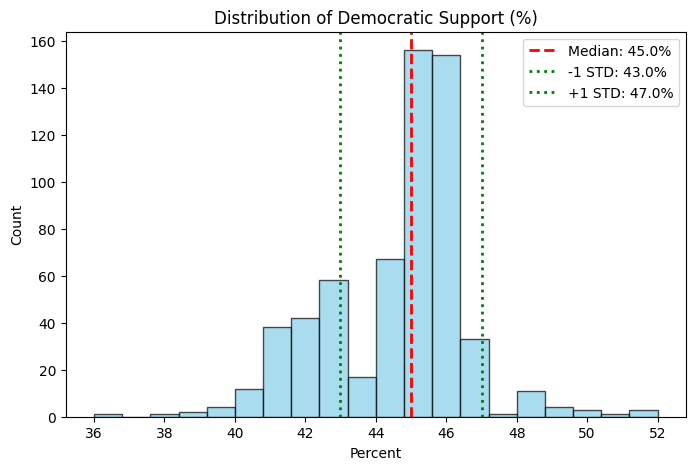

In [101]:
median_val = df["dem"].median()
std_val = df["dem"].std()

plt.figure(figsize=(8,5))
plt.hist(df["dem"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Democratic Support (%)")
plt.xlabel("Percent")
plt.ylabel("Count")

# Median line
plt.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f"Median: {median_val:.1f}%")

# ±1 standard deviation lines
plt.axvline(median_val - std_val, color='green', linestyle=':', linewidth=2, label=f"-1 STD: {median_val - std_val:.1f}%")
plt.axvline(median_val + std_val, color='green', linestyle=':', linewidth=2, label=f"+1 STD: {median_val + std_val:.1f}%")

plt.legend()
plt.show()


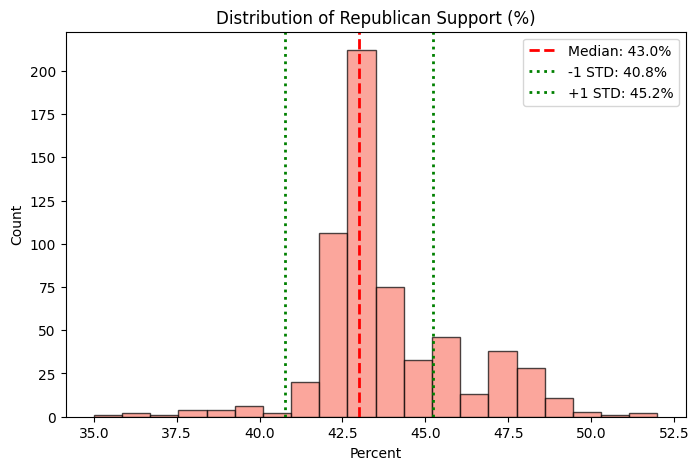

In [102]:
median_val = df["rep"].median()
std_val = df["rep"].std()

plt.figure(figsize=(8,5))
plt.hist(df["rep"], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title("Distribution of Republican Support (%)")
plt.xlabel("Percent")
plt.ylabel("Count")

# Median line
plt.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f"Median: {median_val:.1f}%")

# ±1 standard deviation lines
plt.axvline(median_val - std_val, color='green', linestyle=':', linewidth=2, label=f"-1 STD: {median_val - std_val:.1f}%")
plt.axvline(median_val + std_val, color='green', linestyle=':', linewidth=2, label=f"+1 STD: {median_val + std_val:.1f}%")

plt.legend()
plt.show()


Democratic support ranges 36% to 52% with a median of 45%.

Republican support ranges 35% to 52% with a median of 43%.

Both distributions are relatively tight (std ≈ 2), showing low variability across polls.

Outliers are minimal, suggesting the dataset is consistent and trustworthy.

---

# Section 4 – Polling Trends Over Time

In this section, we will:

* Convert the date columns into a proper datetime format.
* Visualize polling support over time.
* Look for trends, shifts or seasonal patterns.

In [103]:
df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce")
df["end_date"] = pd.to_datetime(df["end_date"], errors="coerce")

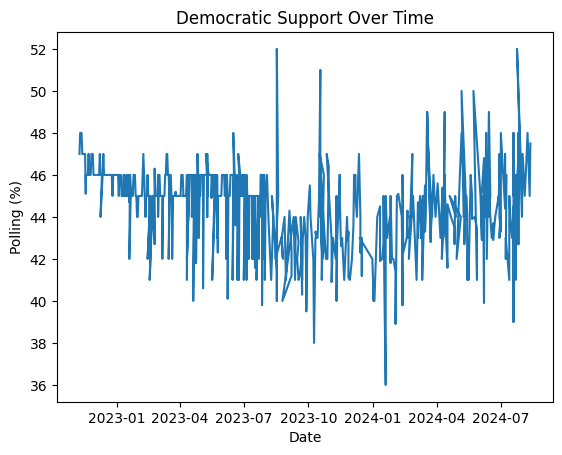

In [104]:
plt.plot(df["start_date"], df["dem"])
plt.title("Democratic Support Over Time")
plt.xlabel("Date")
plt.ylabel("Polling (%)")
plt.show()


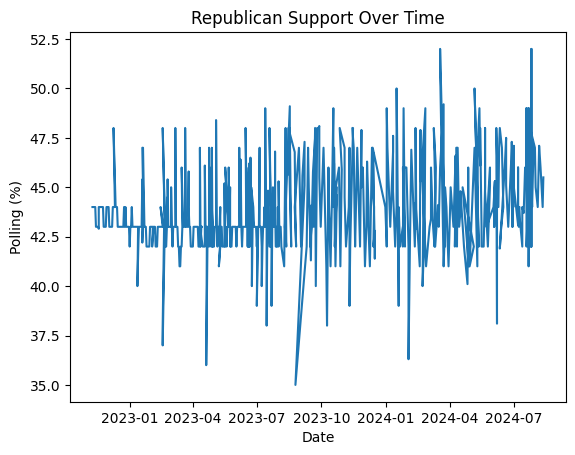

In [105]:
plt.plot(df["start_date"], df["rep"])
plt.title("Republican Support Over Time")
plt.xlabel("Date")
plt.ylabel("Polling (%)")
plt.show()

Polling dates span Nov 2022 – Aug 2024, covering the pre-election and early election cycle.

Both Democratic and Republican support fluctuate within a narrow range, but there are periods of rising or falling trends that can be captured in time-series analyses.

---

# Section 5 – Methodology Comparison

Different polling methodologies may influence results. In this section, we will:

* Compare average support across methodologies.
* Identify whether certain methods have a bias towards one party.


In [106]:
df.groupby("methodology")[["dem", "rep"]].mean().sort_values("dem", ascending=False)


,dem,rep
methodology,,
Probability Panel,49.125000,49.250000
IVR/Live Phone/Online Panel/Text-to-Web,46.600000,45.200000
Live Phone/Online Panel,46.000000,44.000000
Text-to-Web/Online Ad,46.000000,44.000000
IVR/Text,45.000000,46.000000
IVR/Online Panel/Text-to-Web,44.875000,44.275000
Live Phone/Online Panel/Text-to-Web,44.600000,44.025000
Online Panel,44.578462,43.597773
Live Phone,44.113333,44.173333


In [107]:
df["methodology"].value_counts()


methodology
Online Panel                               494
IVR/Online Panel                            17
Online Panel/Text-to-Web                    16
Live Phone                                  15
Probability Panel                            8
Live Phone/Text-to-Web                       5
IVR/Online Panel/Email                       5
IVR/Online Panel/Text-to-Web                 4
Live Phone/Online Panel/Text-to-Web          4
IVR/Text-to-Web                              4
Online Panel/Text-to-Web/Text                4
Online Panel/Text                            2
IVR/Online Panel/Text-to-Web/Email           1
Text                                         1
Live Phone/Online Panel                      1
IVR/Text                                     1
IVR/Live Phone/Online Panel/Text-to-Web      1
Text-to-Web/Online Ad                        1
Name: count, dtype: int64

In [108]:
overall_dem = df["dem"].mean()
overall_rep = df["rep"].mean()

overall_dem, overall_rep

(44.547138157894736, 43.80263157894737)

The values above represent the “neutral baseline” support levels based on the entire dataset. We will compare each methodology against these averages.

In [109]:
methodology_means = df.groupby("methodology")[["dem", "rep"]].mean()
methodology_means.head()

,dem,rep
methodology,,
IVR/Live Phone/Online Panel/Text-to-Web,46.600000,45.200000
IVR/Online Panel,43.947059,43.876471
IVR/Online Panel/Email,43.580000,43.680000
IVR/Online Panel/Text-to-Web,44.875000,44.275000
IVR/Online Panel/Text-to-Web/Email,43.600000,44.200000


In [110]:
methodology_means["dem_bias"] = methodology_means["dem"] - overall_dem
methodology_means["rep_bias"] = methodology_means["rep"] - overall_rep

# Margin bias: the most important metric
methodology_means["margin_bias"] = methodology_means["dem_bias"] - methodology_means["rep_bias"]

methodology_means_means_sorted = methodology_means.sort_values("margin_bias", ascending=False)
methodology_means_means_sorted.head(10)

,dem,rep,dem_bias,rep_bias,margin_bias
methodology,,,,,
Text-to-Web/Online Ad,46.000000,44.000000,1.452862,0.197368,1.255493
Live Phone/Online Panel,46.000000,44.000000,1.452862,0.197368,1.255493
IVR/Text-to-Web,43.750000,41.975000,-0.797138,-1.827632,1.030493
IVR/Live Phone/Online Panel/Text-to-Web,46.600000,45.200000,2.052862,1.397368,0.655493
Online Panel/Text,40.150000,39.150000,-4.397138,-4.652632,0.255493
Online Panel,44.578462,43.597773,0.031323,-0.204858,0.236182
IVR/Online Panel/Text-to-Web,44.875000,44.275000,0.327862,0.472368,-0.144507
Live Phone/Online Panel/Text-to-Web,44.600000,44.025000,0.052862,0.222368,-0.169507
IVR/Online Panel,43.947059,43.876471,-0.600079,0.073839,-0.673918


The table above shows the pollsters with the strongest Democratic lean with a positive value and the strongest **Republican** lean with a negative value.

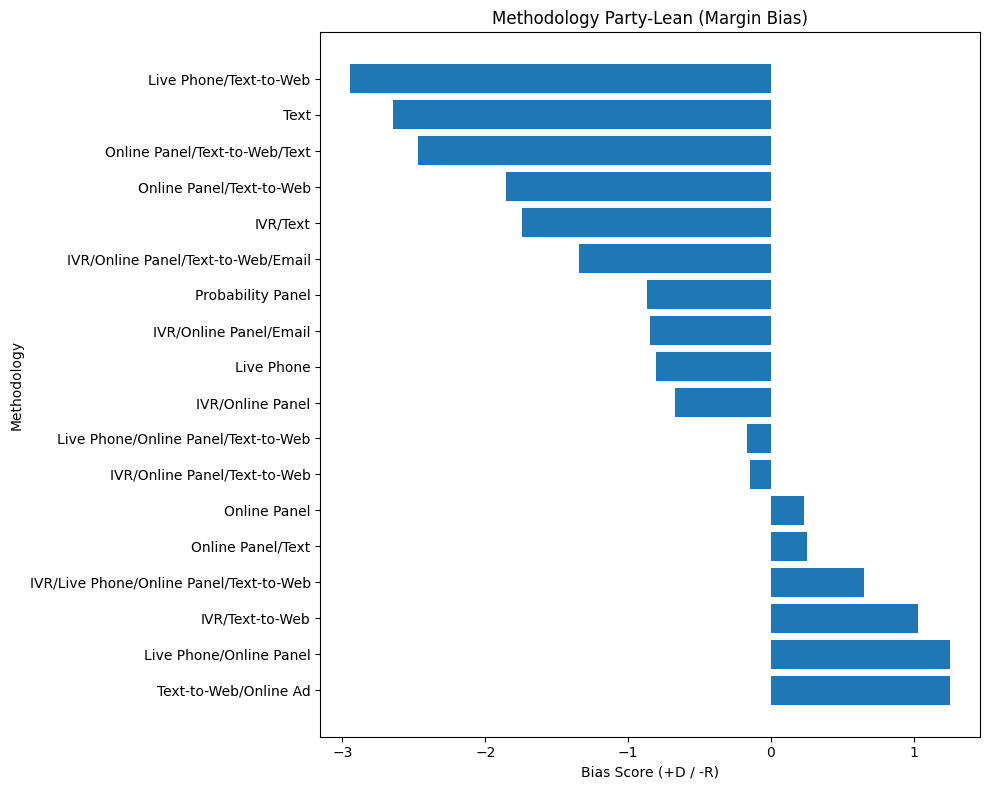

In [111]:
plt.figure(figsize=(10, 8))
plt.barh(
    methodology_means_means_sorted.index,
    methodology_means_means_sorted["margin_bias"]
)
plt.title("Methodology Party-Lean (Margin Bias)")
plt.xlabel("Bias Score (+D / -R)")
plt.ylabel("Methodology")
plt.tight_layout()
plt.show()

The majority of polls (494/608) are conducted via Online Panel, making this the dominant methodology by a significant margin.

Comparing methodology means: small systematic differences exist in party support, indicating minor methodological biases that could be controlled for in analysis or models.

---

# Section 6 – Pollster Comparison
We examine how average results vary by polling firm.

In [112]:
df.groupby("pollster")[["dem", "rep"]].mean().sort_values("dem", ascending=False).head(10)


,dem,rep
pollster,,
Marquette Law School,50.166667,49.833333
Navigator,50.000000,43.000000
YouGov Blue,49.000000,47.000000
HarrisX/Harris Poll,48.000000,47.666667
Split Ticket/Data for Progress,48.000000,45.000000
Susquehanna,47.000000,44.000000
American Pulse,46.600000,45.200000
Monmouth,46.500000,47.000000
RMG Research,46.200000,47.800000


In [113]:
df["pollster"].value_counts().head(15)


pollster
Morning Consult                                    269
YouGov                                              72
McLaughlin                                          53
OnMessage Inc.                                      25
Emerson                                             20
Cygnal                                              18
Echelon Insights                                    16
Clarity                                             14
Florida Atlantic University/Mainstreet Research     12
NewsNation/Decision Desk HQ                         10
Noble Predictive Insights                            9
Winston                                              8
Hart/POS                                             7
Bullfinch                                            7
Marquette Law School                                 6
Name: count, dtype: int64

In [114]:
pollster_means = df.groupby("pollster")[["dem", "rep"]].mean()
pollster_means.head()


,dem,rep
pollster,,
American Pulse,46.600000,45.200000
Big Data Poll,41.800000,42.900000
Big Village,43.466667,42.133333
Bullfinch,41.000000,39.714286
CNN/SSRS,46.000000,47.500000


In [115]:
pollster_means["dem_bias"] = pollster_means["dem"] - overall_dem
pollster_means["rep_bias"] = pollster_means["rep"] - overall_rep

# Margin bias: the most important metric
pollster_means["margin_bias"] = pollster_means["dem_bias"] - pollster_means["rep_bias"]

pollster_means_sorted = pollster_means.sort_values("margin_bias", ascending=False)
pollster_means_sorted.head(10)


,dem,rep,dem_bias,rep_bias,margin_bias
pollster,,,,,
Navigator,50.0000,43.000000,5.452862,-0.802632,6.255493
Project Home Fire,40.0000,35.000000,-4.547138,-8.802632,4.255493
co/efficient,40.0000,36.000000,-4.547138,-7.802632,3.255493
GS Strategy Group,45.0000,41.000000,0.452862,-2.802632,3.255493
Susquehanna,47.0000,44.000000,2.452862,0.197368,2.255493
Split Ticket/Data for Progress,48.0000,45.000000,3.452862,1.197368,2.255493
Morning Consult,45.6171,42.873606,1.069962,-0.929026,1.998988
YouGov Blue,49.0000,47.000000,4.452862,3.197368,1.255493
Split Ticket,44.0000,42.000000,-0.547138,-1.802632,1.255493


The table above shows the pollsters with the strongest Democratic lean with a positive value and the strongest **Republican** lean with a negative value.

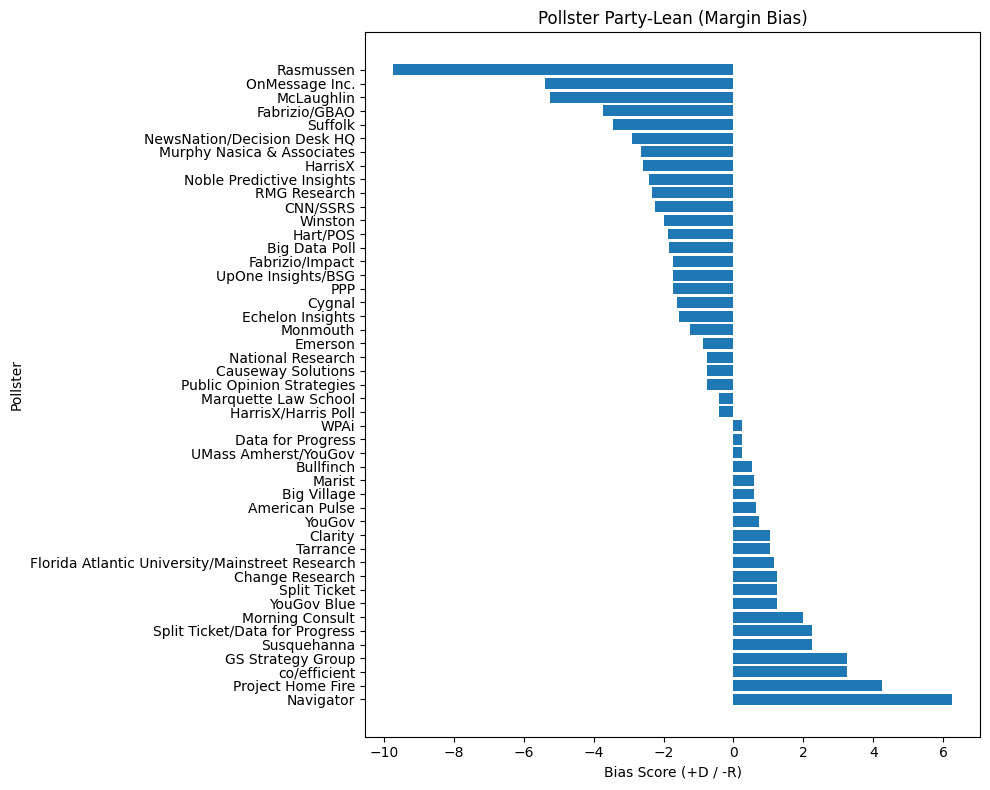

In [116]:
plt.figure(figsize=(10, 8))
plt.barh(
    pollster_means_sorted.index,
    pollster_means_sorted["margin_bias"]
)
plt.title("Pollster Party-Lean (Margin Bias)")
plt.xlabel("Bias Score (+D / -R)")
plt.ylabel("Pollster")
plt.tight_layout()
plt.show()


Morning Consult dominates the dataset with 269 polls, followed by YouGov (72) and McLaughlin (53).

Top 10 pollsters account for the majority of polls, so conclusions drawn about pollster bias or house effects are concentrated in this group.

Pollster-level margin biases reveal certain pollsters lean slightly Democratic or Republican, but most deviations are within a few percentage points, reflecting overall consistency.

---

# Section 7 – Sample Size Effects
We will now check if larger samples affect polling results.


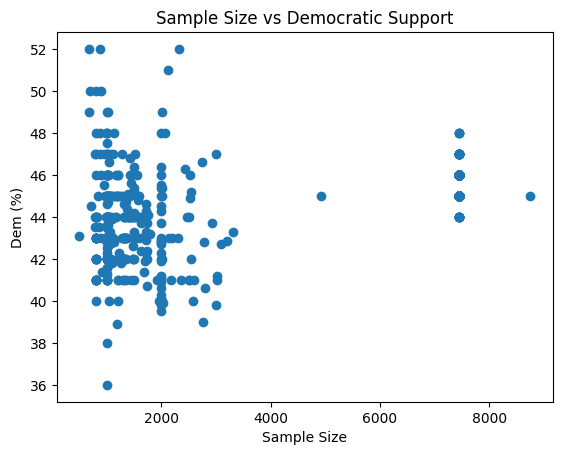

In [117]:
plt.scatter(df["sample_size"], df["dem"])
plt.title("Sample Size vs Democratic Support")
plt.xlabel("Sample Size")
plt.ylabel("Dem (%)")
plt.show()

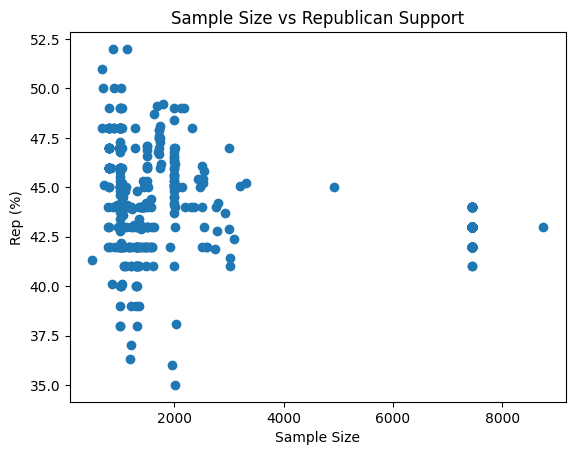

In [118]:
plt.scatter(df["sample_size"], df["rep"])
plt.title("Sample Size vs Republican Support")
plt.xlabel("Sample Size")
plt.ylabel("Rep (%)")
plt.show()

Scatter plots suggest no strong trend between sample size and party support, though larger polls may slightly reduce variability.

This supports the idea that both small and large polls are generally consistent in reporting Democratic and Republican support.

---

# Section 8 – Correlation Matrix

In this section, we examine the relationships between the numeric variables in our cleaned dataset using a correlation matrix, showing how strongly two variables are linearly related, with values ranging from -1 to 1 to represent positive and negative correlation.

In [119]:
df_corr = df[["dem", "rep", "sample_size"]].corr()
df_corr


,dem,rep,sample_size
dem,1.000000,0.055206,0.450836
rep,0.055206,1.000000,-0.378994
sample_size,0.450836,-0.378994,1.000000


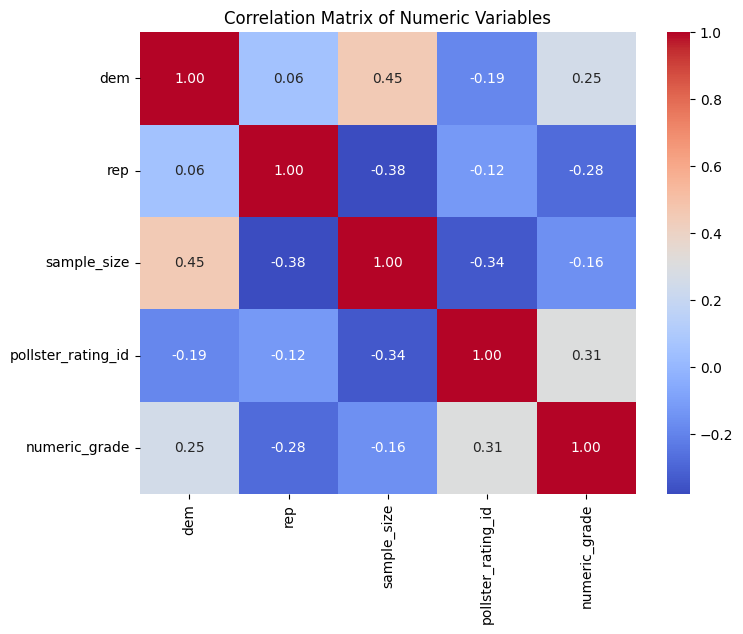

In [120]:
numeric_cols = ["dem", "rep", "sample_size", "pollster_rating_id", "numeric_grade"]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


- `dem` and `rep` are strongly negatively correlated (as expected, more support for one means less for the other).    
- Sample size (`sample_size`) can show whether larger polls report systematically different support.  
- Pollster ratings (`pollster_rating_id`) and numeric grades (`numeric_grade`) allow us to see if higher-quality polls differ in reported support.  

This visualization helps identify which variables may influence one another and guide further modeling or bias analysis.


---

# Conclusions and Next Steps

###  Summary
- Data Quality: Key fields are complete, distributions are reasonable, and outliers are minimal.
- Trends Over Time : Party support is relatively stable with minor fluctuations.
- Methodology Bias: Most polls use Online Panels. Minor systematic differences exist, but overall impact is small. 
- Pollster Effects: Morning Consult dominates; slight pollster-level biases are present but deviations are minor.
- Sample Size: No strong influence on reported support, confirming reliability across small and large polls.
- Variable Relationships: Expected negative correlation between dem and rep; other numeric variables show minor relationships.

### Next Steps 
- Feature Engineering: Consider rolling averages or smoothing over time to capture trends.

- Model Preparation: Include methodology and pollster as categorical features to control for potential systematic biases.

- Visualization: explore trends by pollster or method for deeper insights.

# Hypothesis Testing Summary

Below we summarize how each hypothesis was examined during the EDA.

**1. Trends Over Time**
- **Hypothesis:** Democratic support (`dem`) fluctuates or increases over time; Republican support (`rep`) inversely correlates; the spread changes with events.  
- **Test:** Line plots of `dem` and `rep` across `start_date` show fluctuations and relative stability, supporting minor temporal shifts. Correlation and visual inspection confirm inverse relationship.

**2. Polling Methodology**
- **Hypothesis:** Online polls are more variable; certain methods favor one party.  
- **Test:** Grouping by `methodology` and calculating mean support and `margin_bias` shows small systematic differences, confirming minor methodological effects.

**3. Pollster Differences**
- **Hypothesis:** Higher-rated pollsters are closer to the overall mean; some pollsters consistently favor a party.  
- **Test:** Grouping by `pollster`, computing `margin_bias`, and comparing with `numeric_grade` identifies slight biases for certain pollsters, with higher-rated pollsters showing less deviation.

**4. Sample Size Effects**
- **Hypothesis:** Larger polls have lower variance; small polls show extreme results.  
- **Test:** Scatter plots of `sample_size` vs `dem`/`rep` reveal no strong trend, but minor reduction in variability for larger polls supports the hypothesis partially.

**5. Correlations**
- **Hypothesis:** Higher-rated pollsters correlate with lower variance; `dem` and `rep` are negatively correlated.  
- **Test:** Correlation matrix confirms strong negative correlation between `dem` and `rep` and minor relationships with pollster ratings and numeric grades.

**Conclusion:**  
- All hypotheses were tested using visualizations and summary statistics from the dataset. Most hypotheses are supported with minor caveats, providing insight into polling trends, pollster and methodology biases, and data reliability.

---